In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [12]:
uni = pd.read_csv("C:/Users/User/Downloads/demo-data.csv")
uni.describe()
uni.head()

,date,voucher_number,voucher_type,party_name,mailing_state,branch_name,mailing_pincode,item,rate,quantity,amount
0,4/1/2020,1,Credit Note,AMBIKA OCTROI CLEARING AGENCY (Dhaisar-E),Maharashtra,Andheri,400068,2 ETHYL HEXANOL,0.0,-10,0.0
1,4/1/2020,20200401-1,DLR SCHEM,AMBIKA OCTROI CLEARING AGENCY (Dhaisar-E),Maharashtra,Andheri,400068,2 ETHYL HEXANOL,0.0,-10,0.0
2,6/8/2020,SRT/AND/0007,GST SALES RETURN,BHARAT BROTHERS (MASJID BUNDER),Maharashtra,Andheri,400003,ITEM A,167.0,55,-9185.0
3,6/8/2020,SRT/AND/0007,GST SALES RETURN,BHARAT BROTHERS (MASJID BUNDER),Maharashtra,Andheri,400003,CUTTER MACHINE,0.0,1,0.0
4,6/8/2020,SRT/AND/0003,GST SALES RETURN,Indian Ply-N-Laminates (Dadar-W),Maharashtra,Andheri,400028,EURO XTRA 1KGX55PCH-CRB (XT1-CRB55-SIL20),155.0,55,-8525.0


In [13]:
uni = uni.dropna()
uni = uni.drop(['date','voucher_number','voucher_type','mailing_state','branch_name','mailing_pincode'],axis=1)

In [15]:
uni = uni.drop('item',axis=1)
uni.head()

,party_name,rate,quantity,amount
0,AMBIKA OCTROI CLEARING AGENCY (Dhaisar-E),0.0,-10,0.0
1,AMBIKA OCTROI CLEARING AGENCY (Dhaisar-E),0.0,-10,0.0
2,BHARAT BROTHERS (MASJID BUNDER),167.0,55,-9185.0
3,BHARAT BROTHERS (MASJID BUNDER),0.0,1,0.0
4,Indian Ply-N-Laminates (Dadar-W),155.0,55,-8525.0


In [17]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head()
# Converting into numpy array
uni = uni.data.values
uni

array([[ 0.00000e+00, -1.00000e+01,  0.00000e+00],
       [ 0.00000e+00, -1.00000e+01,  0.00000e+00],
       [ 1.67000e+02,  5.50000e+01, -9.18500e+03],
       ...,
       [ 1.63660e+02, -1.10000e+02,  1.80026e+04],
       [ 0.00000e+00, -2.00000e+00,  0.00000e+00],
       [ 1.67000e+02, -1.00000e+02,  1.67000e+04]])

In [58]:
# Normalizing the numerical data 
uni_normal = scale(uni)

In [59]:
uni_normal

array([[-0.31760436, -0.02727029, -0.03797061],
       [-0.31760436, -0.02727029, -0.03797061],
       [ 0.05225898,  0.17687417, -0.25032212],
       ...,
       [ 0.04486171, -0.34133869,  0.37823834],
       [-0.31760436, -0.00214482, -0.03797061],
       [ 0.05225898, -0.30993185,  0.34812304]])

In [60]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [61]:
pca_values

array([[-0.01511643, -0.31828744, -0.03902006],
       [-0.01511643, -0.31828744, -0.03902006],
       [-0.30076139,  0.05824105, -0.05317145],
       ...,
       [ 0.50974633,  0.03334183,  0.02521733],
       [-0.0328731 , -0.31746834, -0.02126283],
       [ 0.46643173,  0.04178835,  0.02595337]])

In [62]:
pca = PCA(n_components = 3)
pca_values = pca.fit_transform(uni_normal)

In [63]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([6.66066848e-01, 3.33312176e-01, 6.20976092e-04])

In [64]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 66.61,  99.94, 100.  ])

In [65]:
pca.components_

array([[ 2.37403598e-02, -7.06719723e-01,  7.07095205e-01],
       [ 9.99467997e-01,  3.26002303e-02, -9.73707862e-04],
       [-2.23633280e-02,  7.06742144e-01,  7.07117687e-01]])

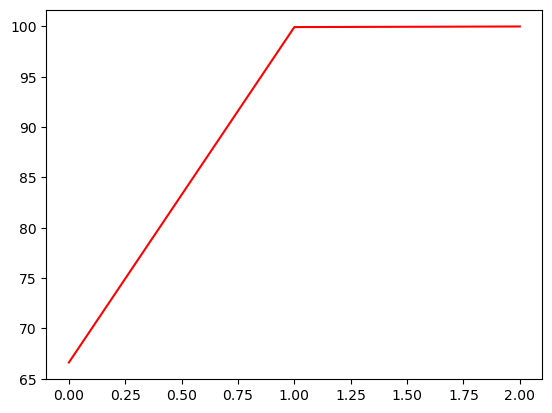

In [66]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [67]:
pca_values[:,0:1]

array([[-0.01511643],
       [-0.01511643],
       [-0.30076139],
       ...,
       [ 0.50974633],
       [-0.0328731 ],
       [ 0.46643173]])

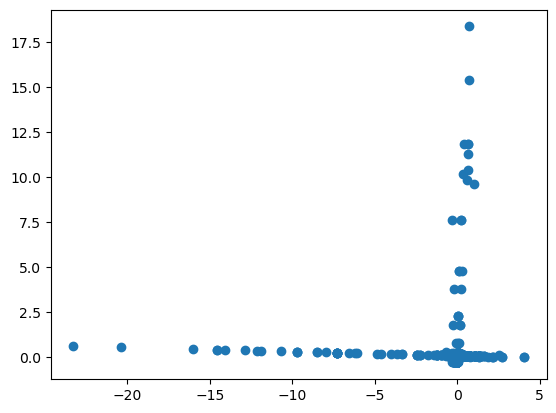

In [68]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:,2:3]
plt.scatter(x,y)

In [ ]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), uni[['perty_name']]], axis = 1,)


In [72]:
import seaborn as sns
sns.scatterplot(data=uni,x='pc1',y='pc2',hue='party_name')